## Final Project Submission

Please fill out:
* Student name: Nicholus Magak
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Business Understanding

- Building a model to help relators price house in the KC area based on parameters such as: condition of a house, floors in a house, number of views done, bathrooms, sqft_living, grade of house, and sqft_above.

- The overall goal is that when the above parameters are combined, there can be a close guestimate for a house price such that the model will be used to price as many houses as possible in the region.


### Data Understanding

- I am currently using the KC House Data 

- The target is the potential house prices

- The predictors I am using: condition of a house, floors in a house, number of views done, bathrooms, sqft_living, grade of house, and sqft_above.

- My rule for the data is to at least have 10n of my model params. 8 * 10 = 80. I belive I have enough data.

### Import necessary libs

In [1]:
# Your code here - remember to use markdown cells for comments as well!

### Import necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

kc_housing_data = pd.read_csv('data/kc_house_data.csv')

print(kc_housing_data[:5])

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

## Data cleaning & preparation

### 1. Finding the columns with null values

In [2]:
## Data cleaning & preparation

# Finding the columns with null values
print(kc_housing_data.isna().sum())

print('This is the total amount of values in data:', len(kc_housing_data['id']))
print(kc_housing_data['waterfront'].unique())

## In the waterfront column there is 0 and 1 used as the categorical data
# current solution is to use the median of the data to fill null
kc_housing_data['waterfront'] = kc_housing_data['waterfront'].fillna(kc_housing_data['waterfront'].median())

print(kc_housing_data['view'].unique())

## In the view column, the data is 0, 1, 2, 3, 4 representing the overall 
# amount of times it has been viewed
kc_housing_data['view'] = kc_housing_data['view'].fillna(kc_housing_data['view'].mode()[0])

print(kc_housing_data['yr_renovated'].unique())

## In the year renovated, since there is no representation to show it has 
# been renovated otherwise, all null values get 0 to represent no renovation
kc_housing_data['yr_renovated'] = kc_housing_data['yr_renovated'].fillna(0)


# Final null value check
print(kc_housing_data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
This is the total amount of values in data: 21597
[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
id

In [3]:
kc_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### 2. Changing data types accordingly

In [4]:
## Changing data types accordingly
# changing price column to int
kc_housing_data['price'] = kc_housing_data['price'].astype(np.int64)

## changing floors column to int
kc_housing_data['floors'] = kc_housing_data['floors'].astype(np.int64)

## changing waterfront column to int
kc_housing_data['waterfront'] = kc_housing_data['waterfront'].astype(np.int64)

## changing year renovated to int
kc_housing_data['yr_renovated'] = kc_housing_data['yr_renovated'].astype(np.int64)

## changing view to int
kc_housing_data['view'] = kc_housing_data['view'].astype('int')

kc_housing_data['sqft_basement'] = kc_housing_data['sqft_basement'].apply(lambda x: '0.0' if x == '?' else x)
kc_housing_data['sqft_basement'] = kc_housing_data['sqft_basement'].astype('float')
kc_housing_data['sqft_basement'] = kc_housing_data['sqft_basement'].astype(np.int64)

kc_housing_data = kc_housing_data.replace(to_replace='None', value=np.nan)
kc_housing_data = kc_housing_data.dropna(axis=0, how='any')

In [5]:
## Drop irrelevant columns
# 'date', 'sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
columns_to_drop = ['date', 'zipcode', 'bathrooms', 'id']

kc_manipulation_data = kc_housing_data.copy()
kc_manipulation_data = kc_manipulation_data.drop(columns_to_drop, axis=1)

In [6]:
# Detecting and dropping outliers
columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']
#for col in kc_manipulation_data.columns:
#    if col == 'id':
#        continue
#    columns.append(col)

def outlier_func(kc_manipulation_data, x):
    # IQR
    Q1 = np.percentile(kc_manipulation_data[x], 25, interpolation='midpoint')
    
    Q3 = np.percentile(kc_manipulation_data[x], 75, interpolation='midpoint')
    
    IQR = Q3 - Q1
    
    upper = []
    lower = []
    print("On the:",x,"column")
    print("Top of range target: ", Q3+1.5*IQR)
    print("Bottom of range target: ", Q1-1.5*IQR)
    
    len_ofDF = range(len(kc_manipulation_data))
    
    kc_manipulation_data.reset_index(drop=True)
    
    for index_num, current in enumerate(kc_manipulation_data[x]):
        if index_num in kc_manipulation_data.index:
            if current >= (Q3+1.5*IQR):
                kc_manipulation_data = kc_manipulation_data.replace(kc_manipulation_data[x].values[index_num], np.nan)

            if current <= (Q1-1.5*IQR):
                kc_manipulation_data = kc_manipulation_data.replace(kc_manipulation_data[x].values[index_num], np.nan)
        else:
            continue
    kc_manipulation_data = kc_manipulation_data.dropna(subset=[x])
    print("Done with the: ", x,"column")
    return kc_manipulation_data

for col in columns:
    kc_manipulation_data = outlier_func(kc_manipulation_data, col)

# Remove any rows that may have a null value in them
kc_manipulation_data = kc_manipulation_data.dropna(axis=0, how='any')

print("Length of data remaining: ", len(kc_manipulation_data))

On the: sqft_living column
Top of range target:  4230.0
Bottom of range target:  -250.0
Done with the:  sqft_living column
On the: sqft_lot column
Top of range target:  nan
Bottom of range target:  nan
Done with the:  sqft_lot column
On the: sqft_above column
Top of range target:  3600.0
Bottom of range target:  -240.0
Done with the:  sqft_above column
On the: sqft_living15 column
Top of range target:  nan
Bottom of range target:  nan
Done with the:  sqft_living15 column
On the: sqft_lot15 column
Top of range target:  nan
Bottom of range target:  nan
Done with the:  sqft_lot15 column
On the: sqft_basement column
Top of range target:  1250.0
Bottom of range target:  -750.0
Done with the:  sqft_basement column
Length of data remaining:  4945


### Categorical variables


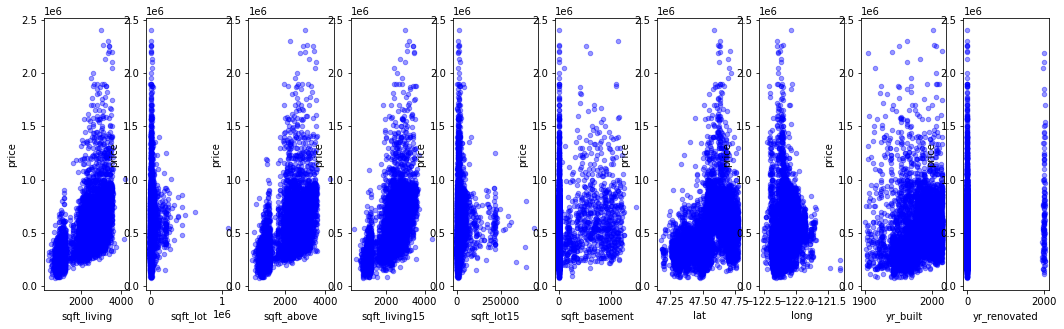

In [7]:
# continuous variables
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(18,5))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'lat', 'long', 'yr_built', 'yr_renovated'], axes):
    kc_manipulation_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

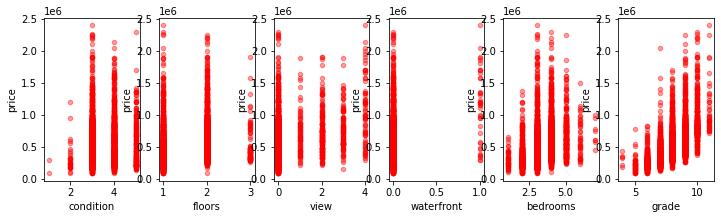

In [8]:
# discrete variables
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12,3))

for xcol, ax in zip([ 'condition', 'floors', 'view', 'waterfront', 'bedrooms', 'grade'], axes):
    kc_manipulation_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

In [9]:
# creating dummy variables
condition_dummies = pd.get_dummies(kc_manipulation_data['condition'], prefix='cond', drop_first=True)
floors_dummies = pd.get_dummies(kc_manipulation_data['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(kc_manipulation_data['view'], prefix='view')
waterfront_dummies = pd.get_dummies(kc_manipulation_data['waterfront'], prefix='wtfront')
bedroom_dummies = pd.get_dummies(kc_manipulation_data['bedrooms'], prefix='bd')
grade_dummies = pd.get_dummies(kc_manipulation_data['grade'], prefix='grd')

# drop the old columns and replace with dummy columns
kc_manipulation_data = kc_manipulation_data.drop(['condition', 'floors', 'view', 'waterfront', 'bedrooms', 'grade'], axis=1)

kc_manipulation_data = pd.concat([kc_manipulation_data, condition_dummies, floors_dummies, view_dummies, grade_dummies, waterfront_dummies, bedroom_dummies], axis=1)
kc_manipulation_data.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,...,grd_11,wtfront_0,wtfront_1,bd_1,bd_2,bd_3,bd_4,bd_5,bd_6,bd_7
2,180000,770.0,10000.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,...,0,1,0,0,1,0,0,0,0,0
6,257500,1715.0,6819.0,1715.0,0.0,1995.0,0.0,47.3097,-122.327,2238.0,...,0,1,0,0,0,1,0,0,0,0
9,323000,1890.0,6560.0,1890.0,0.0,2003.0,0.0,47.3684,-122.031,2390.0,...,0,1,0,0,0,1,0,0,0,0
16,395000,1890.0,14040.0,1890.0,0.0,1994.0,0.0,47.7277,-121.962,1890.0,...,0,1,0,0,0,1,0,0,0,0
18,189000,1200.0,9850.0,1200.0,0.0,1921.0,0.0,47.3089,-122.210,1060.0,...,0,1,0,0,1,0,0,0,0,0


### 3. Checking for Multicollinearity

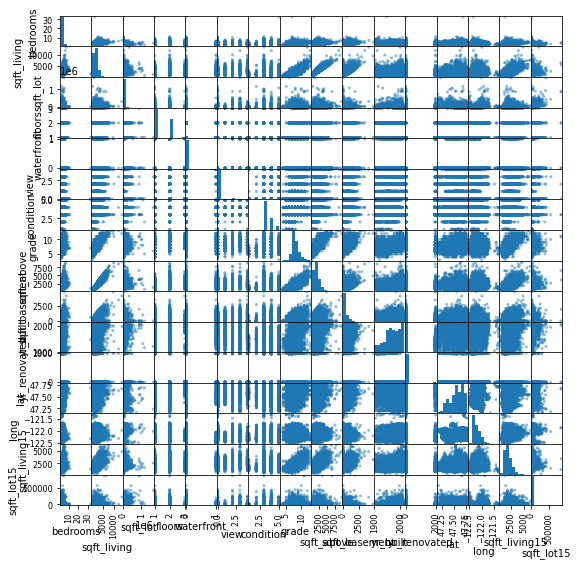

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690
sqft_living,0.578212,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.085514,0.230227,0.144763,0.718204
floors,0.158065,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,0.518037,-0.231754,0.578549,-0.009505,0.029218,0.159481,0.296797,-0.012766
waterfront,-0.002127,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,-0.012157,-0.037628,0.083823,0.030658
view,0.078354,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.006321,-0.077702,0.278928,0.073083
condition,0.026496,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.356563,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,0.113575,0.200341,0.713867,0.120981
sqft_above,0.479386,0.876448,0.184139,0.518037,0.071778,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,0.020645,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.428660,0.015031,-0.231754,0.083050,0.270629,0.168482,0.165843,-0.051175,1.000000,-0.130085,0.065008,0.109853,-0.142369,0.199288,0.015885


In [10]:
## Checking for Multicollinearity
# picking out my predictors only
kc_manipulation_data.head()
# remove the y (target)
columns_to_drop.extend(['price'])
kc_preds = kc_housing_data.drop(columns_to_drop, axis=1)
kc_preds.head()

# using a scatter plot to show the relationship between 
pd.plotting.scatter_matrix(kc_preds, figsize=[9, 9]);
plt.show()

kc_preds.corr()


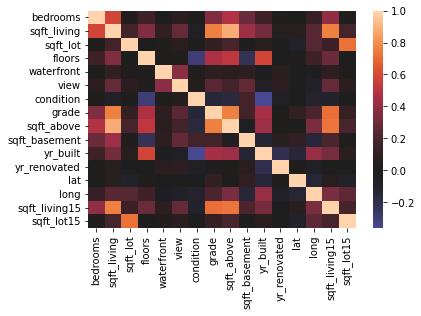

In [11]:
# heat map
import seaborn as sns
sns.heatmap(kc_preds.corr(), center=0);

### Modeling using raw features

In [12]:
from statsmodels.formula.api import ols

In [13]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'lat', 'long', 'yr_built', 'yr_renovated']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_manipulation_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     631.6
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:15:30   Log-Likelihood:                -67094.
No. Observations:                4945   AIC:                         1.342e+05
Df Residuals:                    4934   BIC:                         1.343e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.208e+07   2.97e+06    -17.544      0.000   -5.79e+07   -4.63e+07
sqft_living     125.5217     51.413      2.441      0.015      24.729     226.314
sqft_lot          0.1089      0.100      1.085      0.278      -0.088       0.305
sqft_above       47.9732     51.560      0.930      0.352     -53.107     149.054
sqft_living15   109.7729      7.116     15.426      0.000      95.822     123.724
sqft_lot15       -0.1104      0.129     -0.857      0.391      -0.363       0.142
sqft_basement    43.9583     51.873      0.847      0.397     -57.735     145.652
lat            6.387e+05   1.91e+04     33.433      0.000    6.01e+05    6.76e+05
long          -2.069e+05   2.21e+04     -9.360      0.000    -2.5e+05   -1.64e+05
yr_built      -1844.5151    139.066    -13.264      0.000   -2117.146   -1571.884
yr_renovated     55.2585      8.842      6.250      0.000      37.924      72.592
==============================================================================
Omnibus:                     2423.288   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23628.650
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      12.836   Cond. No.                     5.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

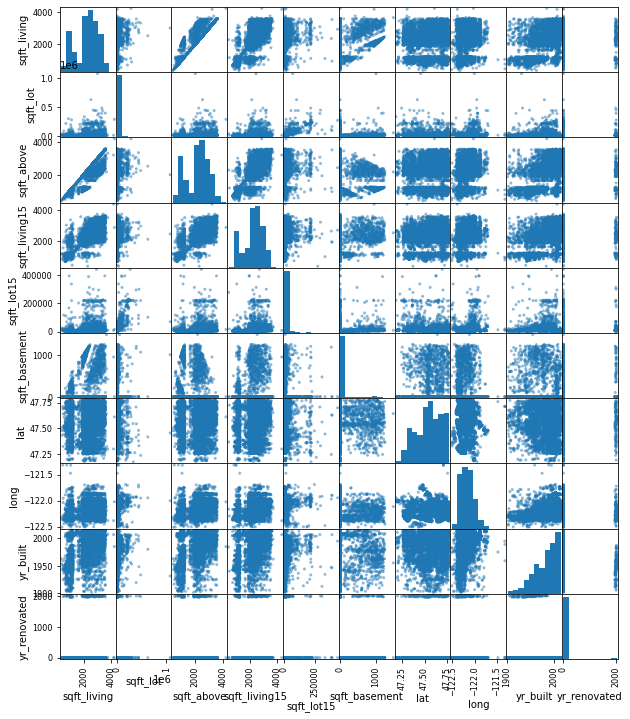

In [14]:
pd.plotting.scatter_matrix(kc_manipulation_data[x_cols], figsize=(10, 12));

### Transforming Non-Normal Features

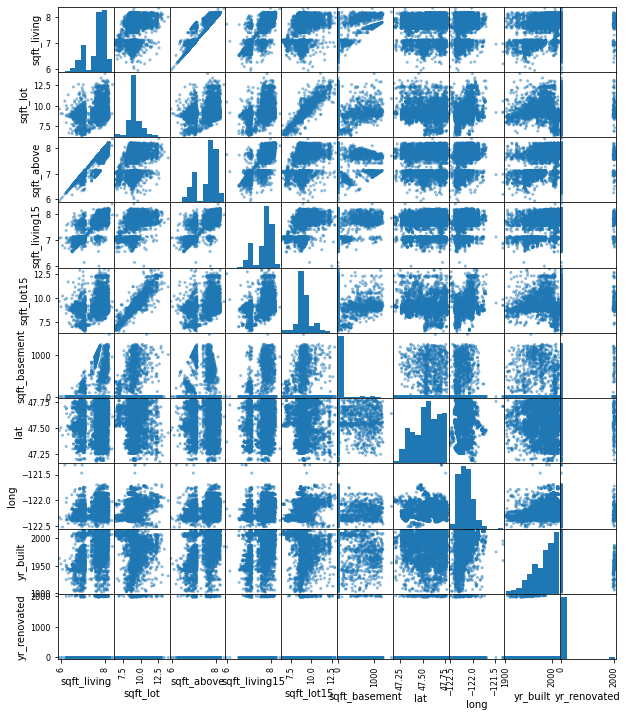

In [15]:
non_normal_x = ['sqft_living', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_living15']
for feature in non_normal_x:
    # performing log transformation on non-normal features
    kc_manipulation_data[feature] = kc_manipulation_data[feature].map(lambda x: np.log(x))

pd.plotting.scatter_matrix(kc_manipulation_data[x_cols], figsize=(10,12));

### After transforming Non-Normal Features

In [16]:
model = ols(formula=formula, data=kc_manipulation_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     584.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:15:53   Log-Likelihood:                -67201.
No. Observations:                4945   AIC:                         1.344e+05
Df Residuals:                    4934   BIC:                         1.345e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.393e+07   3.14e+06    -17.153      0.000   -6.01e+07   -4.78e+07
sqft_living   -1.533e+05   5.71e+04     -2.683      0.007   -2.65e+05   -4.13e+04
sqft_lot      -1.313e+04   8332.224     -1.575      0.115   -2.95e+04    3208.783
sqft_above     4.613e+05   5.45e+04      8.466      0.000    3.55e+05    5.68e+05
sqft_living15  1.923e+05   1.45e+04     13.250      0.000    1.64e+05    2.21e+05
sqft_lot15     9271.2844   8788.038      1.055      0.291   -7957.181    2.65e+04
sqft_basement   224.7947     29.070      7.733      0.000     167.804     281.785
lat            6.608e+05   1.96e+04     33.757      0.000    6.22e+05    6.99e+05
long          -1.908e+05    2.3e+04     -8.290      0.000   -2.36e+05   -1.46e+05
yr_built      -2034.3672    157.772    -12.894      0.000   -2343.671   -1725.063
yr_renovated     51.3053      9.046      5.671      0.000      33.571      69.040
==============================================================================
Omnibus:                     2401.585   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23088.038
Skew:                           2.098   Prob(JB):                         0.00
Kurtosis:                      12.718   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Feature Scaling and Normalization

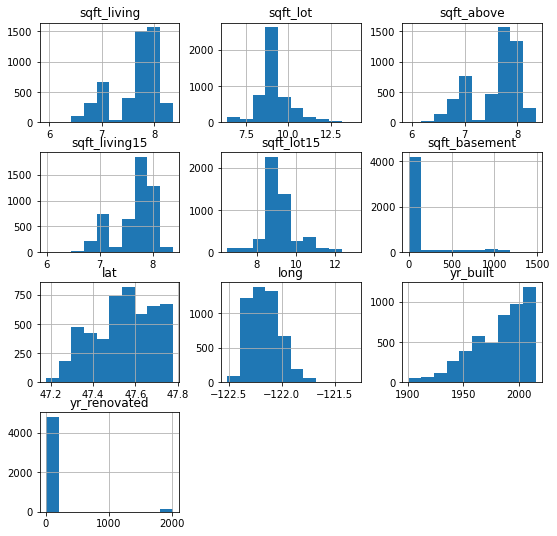

In [17]:
# Just a closer view of the individual columns after transformation
# 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bedrooms'
kc_manipulation_data[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'lat', 'long', 'yr_built', 'yr_renovated']].hist(figsize  = [9, 9]); 

### Min Max Scaling

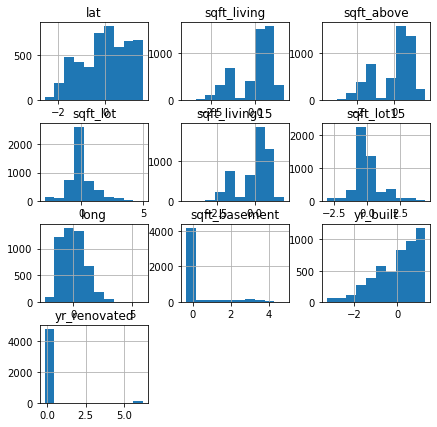

In [18]:
# The log transformations made the continuous data more normal than before
# logBathrooms = kc_manipulation_data['bathrooms']
logSqft_living = kc_manipulation_data['sqft_living']
logSqft_above = kc_manipulation_data['sqft_above']
logSqft_lot = kc_manipulation_data['sqft_lot']
logSqft_lv_15 = kc_manipulation_data['sqft_living15']
logSqft_lt_15 = kc_manipulation_data['sqft_lot15']
logSqft_bs = kc_manipulation_data['sqft_basement']
# logBeds = kc_manipulation_data['bedrooms']


def scaling_func(x):
    return (x - np.mean(x)) / np.sqrt(np.var(x))

scaled_lat = scaling_func(kc_manipulation_data['lat'])
scaled_sq_living = scaling_func(logSqft_living)
scaled_sq_above = scaling_func(logSqft_above)
scaled_sq_lot = scaling_func(logSqft_lot)
scaled_sq_lv_15 = scaling_func(logSqft_lv_15)
scaled_sq_lt_15 = scaling_func(logSqft_lt_15)
scaled_long = scaling_func(kc_manipulation_data['long'])
scaled_sq_bs = scaling_func(kc_manipulation_data['sqft_basement'])
scaled_yr_built = scaling_func(kc_manipulation_data['yr_built'])
scaled_yr_ren = scaling_func(kc_manipulation_data['yr_renovated'])
# scaled_baths = scaling_func(kc_manipulation_data['bathrooms'])


data_cont_scaled = pd.DataFrame([])
data_cont_scaled['lat'] = scaled_lat
data_cont_scaled['sqft_living'] = scaled_sq_living
data_cont_scaled['sqft_above'] = scaled_sq_above
data_cont_scaled['sqft_lot'] = scaled_sq_lot
data_cont_scaled['sqft_living15'] = scaled_sq_lv_15
data_cont_scaled['sqft_lot15'] = scaled_sq_lt_15
data_cont_scaled['long'] = scaled_long
data_cont_scaled['sqft_basement'] = scaled_sq_bs
data_cont_scaled['yr_built'] = scaled_yr_built
data_cont_scaled['yr_renovated'] =scaled_yr_ren
# data_cont_scaled['bathrooms'] = scaled_baths


data_cont_scaled.hist(figsize = [7, 7]);

# 

## Modeling

In [19]:
kc_fin_data = pd.DataFrame([])
kc_fin_data['lat'] = scaled_lat
kc_fin_data['sqft_living'] = scaled_sq_living
kc_fin_data['sqft_above'] = scaled_sq_above
kc_fin_data['sqft_lot'] = scaled_sq_lot
kc_fin_data['sqft_living15'] = scaled_sq_lv_15
kc_fin_data['sqft_lot15'] = scaled_sq_lt_15
kc_fin_data['long'] = scaled_long
kc_fin_data['sqft_basement'] = scaled_sq_bs
kc_fin_data['yr_built'] = scaled_yr_built
kc_fin_data['yr_renovated'] = scaled_yr_ren
# kc_fin_data['bathrooms'] = scaled_baths
price = kc_manipulation_data['price']

kc_fin_data = pd.concat([price, kc_fin_data, condition_dummies, floors_dummies, view_dummies], axis=1)

In [20]:
kc_fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4945 entries, 2 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4945 non-null   int64  
 1   lat            4945 non-null   float64
 2   sqft_living    4945 non-null   float64
 3   sqft_above     4945 non-null   float64
 4   sqft_lot       4945 non-null   float64
 5   sqft_living15  4945 non-null   float64
 6   sqft_lot15     4945 non-null   float64
 7   long           4945 non-null   float64
 8   sqft_basement  4945 non-null   float64
 9   yr_built       4945 non-null   float64
 10  yr_renovated   4945 non-null   float64
 11  cond_2         4945 non-null   uint8  
 12  cond_3         4945 non-null   uint8  
 13  cond_4         4945 non-null   uint8  
 14  cond_5         4945 non-null   uint8  
 15  floor_2        4945 non-null   uint8  
 16  floor_3        4945 non-null   uint8  
 17  view_0         4945 non-null   uint8  
 18  view_1 

### Linear regression using scikit-learn

In [21]:
## Split the data
from sklearn.model_selection import train_test_split
X_predictors = kc_fin_data.drop(['price'], axis=1)
y = kc_fin_data['price']

# split using random state 42
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y, random_state=42, test_size=0.33)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error: ', train_mse)
print('Test Mean Squared Error: ', test_mse)

print("Accuracy of the Linear Regression model(Train) is: ", linreg.score(X_train, y_train)*100, "%")
print("Accuracy of the Linear Regression model(Test) is: ", linreg.score(X_test, y_test)*100, "%")

Train Mean Squared Error:  34001410305.3674
Test Mean Squared Error:  33089750520.99257
Accuracy of the Linear Regression model(Train) is:  58.16715395575034 %
Accuracy of the Linear Regression model(Test) is:  59.452220419305824 %


 ### Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

model_2_trainMSE = mean_squared_error(y_train, model_2.predict(X_train))
model_2_testMSE = mean_squared_error(y_test, model_2.predict(X_test))

print('Train Mean Squared Error: ', model_2_trainMSE)
print('Test Mean Squared Error: ', model_2_testMSE)

print("Accuracy of the Decision Tree model(Train) is: ", model_2.score(X_train, y_train)*100, "%")
print("Accuracy of the Decision Tree model(Test) is: ", model_2.score(X_test, y_test)*100, "%")

Train Mean Squared Error:  25169158.334741924
Test Mean Squared Error:  27637321295.82169
Accuracy of the Decision Tree model(Train) is:  99.96903371018365 %
Accuracy of the Decision Tree model(Test) is:  66.1335611644198 %


### Cross Validation

In [25]:
from sklearn.model_selection import cross_validate

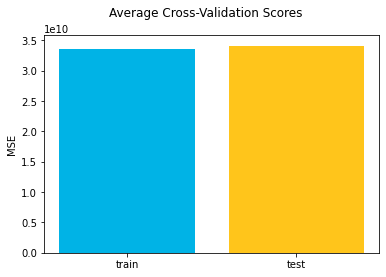

In [26]:
# Linear Regression
cross_val_results = cross_validate(linreg, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)

train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()

fig, ax = plt.subplots()
labels = ["train", "test"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

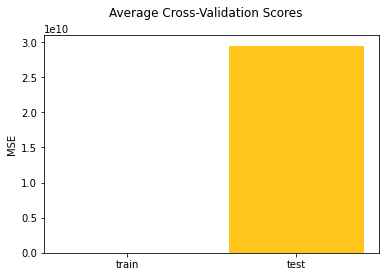

In [27]:
# Decision Tree Regression
cross_val_results = cross_validate(model_2, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)

train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()

fig, ax = plt.subplots()
labels = ["train", "test"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

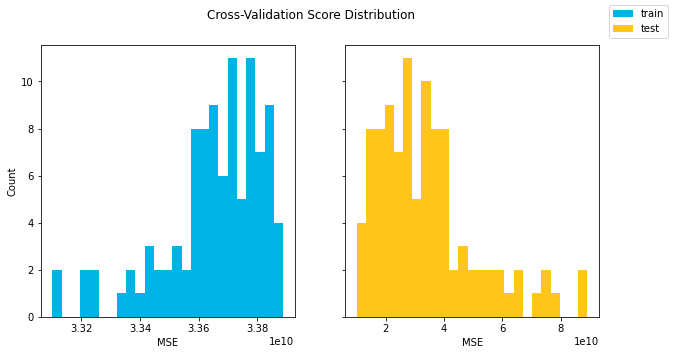

In [28]:
cross_val_results = cross_validate(linreg, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

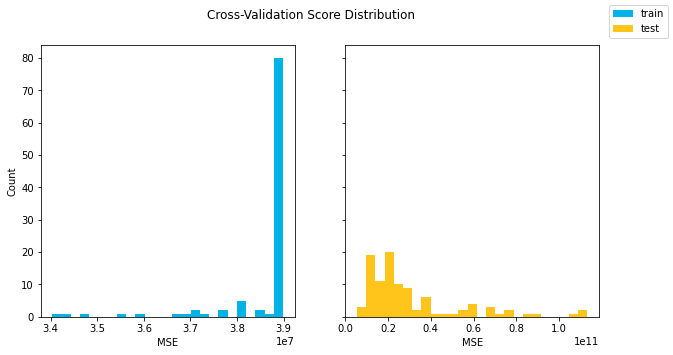

In [29]:
cross_val_results = cross_validate(model_2, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

## In the end, the linear regression achieved an accuracy of about 59% while decision tree regression got 66%. They are not very accurate, however, given more time and research, the models can be fine tuned to achieve higher and greater levels of accuracy
